In [ ]:
#Who doesn't like to take a vacation, to get off from our daily busy work schedules and 
#do what we love to do, explore new places, meet new people, do some activities which 
#would make us feel alive, try new cuisines, walk on streets, shop local items, see how 
#nature has blessed the place, watch some amazing human creations or just relax away from all
#the hallaballo. 
#One such place that I have been looking for is boston, so many things to see, 
#be amazed, but before i plan to visit the city, the most important question for our itinerary,
#is where would you stay?
#Hotel? Motel? Zostel? AirBnB?
#Every group of stay providers have the best to some not so good with them listed, it's on 
#us to do a due deligence before picking the right place to stay as that matters the most in 
#ones stay, the day is decided based on how good sleep you had, how beautiful service you got,
#how pleasant the neighbourhood was.
#We have a dataset of boston, found here: https://www.kaggle.com/datasets/airbnb/boston
#And our analysis will revolve around some of the important questions:
#  1. Is there any relation between the price and reviews/feedbacks provided by the end_users?
#  2. What are group of important words in reviews that gives us confidence to go ahead and make the booking?
#  3. We have heard about super-hosts, is there anything special about the super-hosts when compared with normal ones?
#  4. The data-set is of an year, so do we see any price-trend/change happening over period of time?
#  5. Any specific neighbourhood, which is loved by the hosts & consumers?

# Be with me along and we will try to learn some important concepts and also try to figure out our
#answers:

In [ ]:
#We will follow CRISP-DMs approach:
#When we jump to analyze our datasets, we will have a high level overview of what data we have
#There are 3 excel sheets available, reviews.csv, listings.csv, calendar.csv
#We can ask ourselves some of the questions about what is our "business Understanding"?
#Some of the things we can figure out from the data provided would be?

#1. What features are influencing customer satisfaction? - Reviews & Listing
#2. What are the factors causing change of price over period of time? -Reviews, Listing, Calendar
#3. What features contribute to higher prices? higher priced places have better reviews?
#4. How much are customers willing to pay to stay in Boston?


#Data Understanding
# This we will know when we load and inspect the Data(csv/xlsx files)

#Data Preparation which involves several steps to make the data clean enough for analyzing
#modelling, & to predict our answers for above questions
#Some of the important steps include:
#1. Handling all missing values; null or NaN
#2. Removing duplicates if any
#3. Replacing categorical columns with Numerics so it fits with DataFrame
#4. Use visualization to gain further insights


#Data analysis
#Analyze the different set of data to understand the sentiment, and figure out of if there 
#is any relationship between different factors like price, neighborhood, host, etc with Sentiment

#Evaluation
# Examine the distribution of sentiment scores across different price ranges, by visualizing
# which can be done via different graphs we have at our disposal.


#FINAL ONE:
#Deployment
#We Summarize the findings and insights from the analysis, providing recommendations based on our analysis, and correlation.

In [ ]:
##################################################
#Data Understanding
##################################################
# Step1: Import all relevant libraries (we would import more down the line 
#while we figure out new concepts to approach our problem statements)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#step2: Need to give a quick overview on all csv files to know which columns hold what 
#and will come handy

In [2]:
listing=pd.read_csv('./Datasets/Boston Airbnb Open Data/listings.csv')
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
#We understood not all columns gets printed by just typing head
#Will use the panda feature to display all columns 
pd.set_option('display.max_columns', None)

In [119]:
#one of the very important function of pandas DataFrame is describe
#which provides us a descriptive statistics for numerical columns.
listing.describe()
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [89]:
listing.info() #method provides a concise summary of our df, including the dtypes
#comes in handy to know which column would require encoding/categorical conversions


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [6]:
reviews=pd.read_csv('./Datasets/Boston Airbnb Open Data/reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [7]:
reviews.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [9]:
calendar=pd.read_csv('./Datasets/Boston Airbnb Open Data/calendar.csv')
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [10]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [11]:
##################################################
#Data Preparation
##################################################
#checking if there is any column with huge number of null values
print(listing.isnull().sum())
print(reviews.isnull().sum())
print(calendar.isnull().sum())

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64
listing_id         0
date               0
available          0
price         665853
dtype: int64


In [ ]:
#let's check if any column has more than 50% of value as null, as in that case we can 
#we can drop that column as it won't do us any good

In [12]:
listing_null=listing.isnull().sum()
review_null=reviews.isnull().sum()
calendar_null=calendar.isnull().sum()

total_values_listing = listing.shape[0]
total_values_reviews = reviews.shape[0]
total_values_calendar =calendar.shape[0]

half_total_listing = total_values_listing / 2
half_total_reviews = total_values_reviews / 2
half_total_calendar= total_values_calendar /2

listings_columns_50_percent_null = listing_null[listing_null > half_total_listing]
#print(listings_columns_50_percent_null)
print(type(listing_null))
listing_50_null=listing_null[listing_null > half_total_listing]
#We can drop the resulted column as they will be of no use in future.
print(listing_50_null)

<class 'pandas.core.series.Series'>
notes                           1975
neighbourhood_group_cleansed    3585
square_feet                     3529
weekly_price                    2693
monthly_price                   2697
security_deposit                2243
has_availability                3585
license                         3585
jurisdiction_names              3585
dtype: int64


In [13]:
#let's try to figure out the NaN values
listing.isna().sum()
#here we understood, that NaN and null both are same

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64

In [14]:
#duplicated method is a very important feature to get quick overview of duplicacy
print(listing.duplicated().sum())
#which we would need to remove to keep the dataset ideal
print(reviews.duplicated().sum())
print(calendar.duplicated().sum())

0
0
365


In [15]:
# We found 365 duplicate rows in calendar DataFrame, let's remove that
calendar.drop_duplicates(inplace=True) #if we don't want to work on the main df of calendar.
#we can create a new variable pointing to the result returned 

print(listing.duplicated().sum())
print(reviews.duplicated().sum())
print(calendar.duplicated().sum())
#no duplicate record in any of the DataFrame

0
0
0


In [16]:
#dropping rows which have importatn missing columns
listing.dropna(subset=['host_id', 'price'], inplace=True)
reviews.dropna(subset=['id', 'comments'], inplace=True)
calendar.dropna(subset=['price'], inplace=True)

In [ ]:
##################################################
#Modeling
##################################################
#We are using here another new library, textblob, one of the NLP libraries
#trying for the first time and we will compare with another NLP library 
#VADER (SentimentIntensityAnalyzer from NLTK), 
#we will compare the results of both libs few cells after and decide which one to use
#for future

#At high level TextBlob is very easy to use and requires minimal setup. Useful majorly for
#general sentiment analysis tasks where high precision is not critical.

################apply function####################
#whenever we have to run a set of commands on every row of a column it's always better to 
#write a function and use apply to run the function along an axis
from textblob import TextBlob
def sent_cal(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

reviews['sentiment']=reviews['comments'].apply(lambda x: sent_cal(str(x)))

In [34]:
#whenever there is a common key, between 2 files, and we want to analyze results of both together
#pd.merge() comes in handy.
#merging only selective columns from listing with reviews
#IMPORTANT keywords: left_on: it is the first df reviews column to join on. Here, it is listing_id.
#similarly for other df, right_on
merge_list_cal=pd.merge(reviews, listing[['id','name', 'host_id','price','neighbourhood_cleansed']], left_on='listing_id', right_on='id')

In [35]:
merge_list_cal.drop_duplicates()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,sentiment,id_y,name,host_id,price,neighbourhood_cleansed
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,0.388021,1178162,Private Room Great Location Boston,1407005,$95.00,East Boston
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,0.600000,1178162,Private Room Great Location Boston,1407005,$95.00,East Boston
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,0.200521,1178162,Private Room Great Location Boston,1407005,$95.00,East Boston
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,0.383333,1178162,Private Room Great Location Boston,1407005,$95.00,East Boston
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,0.466667,1178162,Private Room Great Location Boston,1407005,$95.00,East Boston
...,...,...,...,...,...,...,...,...,...,...,...,...
68217,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,0.000000,7462268,"Allston, close to Harvard Business School + BU D",19548932,$75.00,Allston
68218,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,0.218483,7462268,"Allston, close to Harvard Business School + BU D",19548932,$75.00,Allston
68219,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,0.381515,7462268,"Allston, close to Harvard Business School + BU D",19548932,$75.00,Allston
68220,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,0.328030,7462268,"Allston, close to Harvard Business School + BU D",19548932,$75.00,Allston


In [36]:
merge_list_cal.dropna(subset=['price'], inplace=True)

In [37]:
#another important method replace, which helps in executing regex commands
#clubbed with astype which is used to type cast the datatype
#here we are removing $ sign from price column as pd does not understand special symbols
merge_list_cal['price']=merge_list_cal['price'].replace('[\$,]','', regex=True).astype(float)

In [38]:
merge_list_cal.duplicated().sum()

0

In [39]:
#sentiment column is added
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,0.388021
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,0.600000
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,0.200521
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,0.383333
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,0.466667


In [43]:
merge_list_cal.shape

(68222, 12)

In [37]:
####################iloc & loc##########################
#we have 2 very importatn indexing & selection methods
#.loc[row_indexer, col_indexer]: Selects data by labels (row and column names)
#.iloc[row_indexer, col_indexer]: Selects data by integer position (index)
#trying loc to fetch one random row
listing.loc[listing['id']==3075044]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [44]:
print(merge_list_cal['price'].max())
print(merge_list_cal['price'].min())
print(merge_list_cal.shape)

1300.0
11.0
(68222, 12)


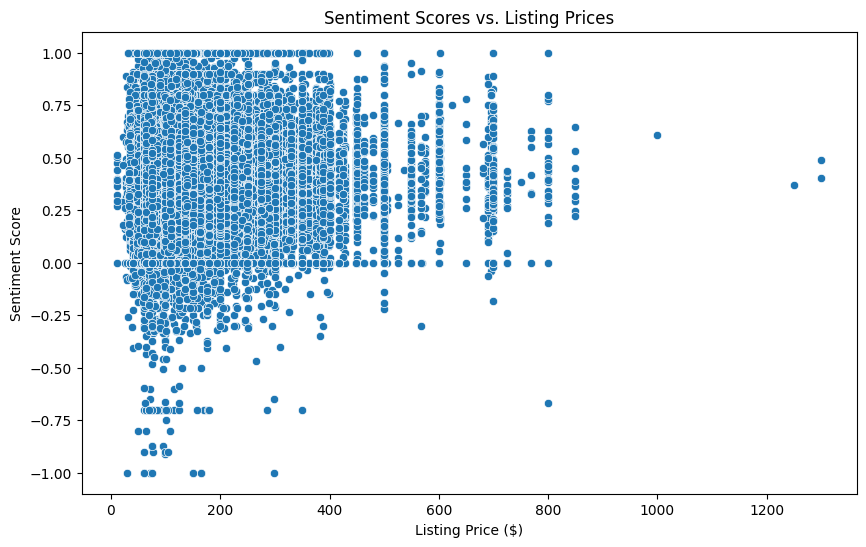

In [45]:
#Visualizing the results 
#we have imported matplotlib & seaborn both 
#will use here combination of both, to plot the average sentiment across different price ranges.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sentiment', data=merge_list_cal)
plt.title('Sentiment Scores vs. Listing Prices')
plt.xlabel('Listing Price ($)')
plt.ylabel('Sentiment Score')
plt.show()

In [ ]:
###############################################
#Summary/Deployment
###############################################
#So we tried to find out a Correlation between listing prices & sentiments of reviews provided 
#by the customers
#The Visualized output correlation gives a fair idea of reviews with high sentiment scores (close to 1). 
# Which indicates that majority of the guests were satisfied with their stay regardless in low to mid range prices.

#So overall, low-priced accomodations are making equal good stay.

#But remember we tried with textblob, which we cannot rely.

In [ ]:
Also we still see some negative reviews, and we need to avoid those places.
how can we do it? Well, let's try to find out some important words that we can look 
in the reviews to gain the confidence of the accomodations 

In [48]:
#We are downloading and importing some new libraries which are specifically 
#designed for analyzing sentiments,to better understand the sentiment expressed in informal, short texts. 


!pip install wordcloud
!pip install nltk
import nltk
#Natural Language Toolkit (NLTK) provides several functions to make our life easy
nltk.download('stopwords')
#one such important module is stopwords which provides a collection of common 
#stopwords(filler words like a,an,the,is,like) for various languages, here we will use for english

nltk.download('vader_lexicon')
import string
#The string module in Python provides a collection of string constants and utility functions
from nltk.tokenize import word_tokenize
#one such important module is tokenize, which helps in splitting text into words or sentences
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
#as we discussed above, similar to textblob we have SentimentIntensityAnalyzer module 
#which also provides sentiment polarity 
from wordcloud import WordCloud


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\arshaikh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\arshaikh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arshaikh\AppData\Roaming\nltk_data...


[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arshaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#we can have comments in Spanish, but due to multi-language limitation, 
#SentimentIntensityAnalyzer function might give us wrong analysis
#to do that we will have to remove all reviews from our DataFrame which are in Spanish to get 
#correct positive/negative sentimenet analysis

!pip install langdetect


In [49]:
#adding a column to have language indicator
#consumes a lot of time, be patient
from langdetect import detect, LangDetectException
def get_lang_detect(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unkonwn"

merge_list_cal['language']=merge_list_cal['comments'].apply(lambda x: get_lang_detect(str(x)))

In [50]:
#creating a function to extract key words and populate new column with it
def tokens_extract(text):
    text=text.translate(str.maketrans('','',string.punctuation))
    #we have to convert ot lower case as string lib works only on lowercase, can be said as limitation
    text=text.lower()
    #extracting words calling it as otken
    tokens=word_tokenize(text)
    stop_words=set(stopwords.words('english'))
    tokens=[word for word in tokens if word not in stop_words]
    return tokens

merge_list_cal=merge_list_cal[merge_list_cal.language=='en']
merge_list_cal['tokens']=merge_list_cal['comments'].apply(lambda x: tokens_extract(str(x)))

In [51]:
#adding nlkt sentiment analyzer column
sent = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    score = sent.polarity_scores(text)
    return score['compound']

# Apply sentiment analysis to the reviews
merge_list_cal['sentiment_score'] = merge_list_cal['comments'].apply(lambda x: get_sentiment_score(str(x)))

In [75]:
#when we check the difference of mean sentiment square between textblob polarity
#and SentimentIntensityAnalyzer polority

merge_list_cal['sentiment_score'].mean() - merge_list_cal['sentiment'].mean()
#merge_list_cal[merge_list_cal['sentiment_score'] > 0 ]['sentiment_score'].mean()

#there is a huge difference which definitely means, the polarity of textblob isn't
#giving the exact results we need.

0.467738554348709

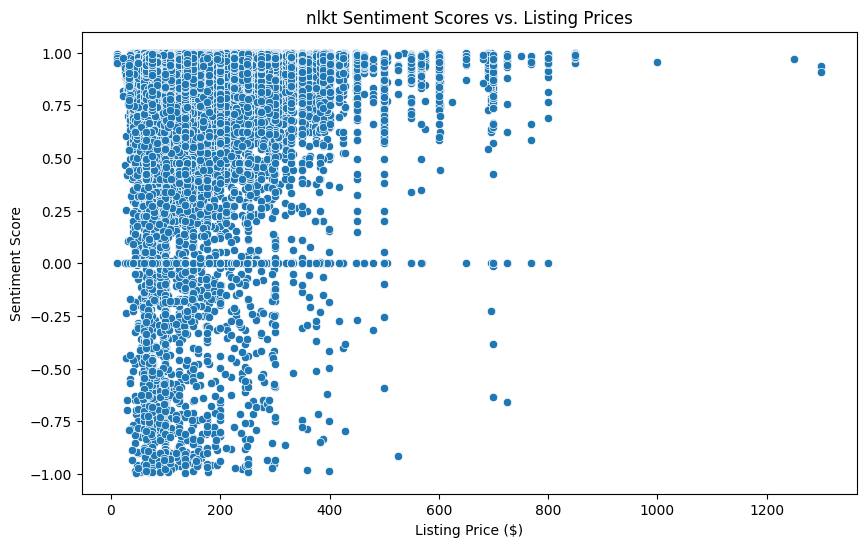

In [76]:
# mapping again the Sentiment score with prices and we see a different results.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sentiment_score', data=merge_list_cal)
plt.title('nlkt Sentiment Scores vs. Listing Prices')
plt.xlabel('Listing Price ($)')
plt.ylabel('Sentiment Score')
plt.show()

In [ ]:
# Now with new plot, there doesn’t appear to be a strong linear correlation between price and sentiment score.
# Positive and negative reviews are present across all price ranges, indicating that other factors 
# (such as the quality of service, cleanliness, accuracy of listing, etc.) may play a significant role in 
# determining guest satisfaction, rather than price alone.

In [77]:
#now we have tokens, we will divide the sentiments column into positive & negative
positive=merge_list_cal[merge_list_cal['sentiment_score']>0]
negative=merge_list_cal[merge_list_cal['sentiment_score']<0]

In [78]:
#On further study we realize that there is a limitation of language with nlkt
#it can analyze the sentiments of one language at a time
#That means we would have to have an additional step to filter only english reviews.

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,sentiment,id_y,name,host_id,price,neighbourhood_cleansed,language,tokens,sentiment_score
15,1178162,11069185,2014-03-18,10454265,Jeffrey,"The room was exactly as pictured, no frills, y...",0.104167,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,en,"[room, exactly, pictured, frills, yet, adequat...",-0.0023
17,1178162,11420562,2014-04-01,6097987,Karthikram,Izzy was great... had clear instructions and n...,0.566667,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,en,"[izzy, great, clear, instructions, problems, e...",-0.6802
24,1178162,12753057,2014-05-10,14113353,Chris,We didn´t meet Izzy at all!!!! After we arrive...,-0.507542,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,en,"[didn´t, meet, izzy, arrived, nobody, except, ...",-0.7798
58,1178162,21219502,2014-10-13,1822593,Alexa,The house was in a very convenient location to...,0.066667,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,en,"[house, convenient, location, airport, walked,...",-0.0765
64,1178162,21809402,2014-10-24,22554506,Claude,Parking situation was bad. Very hard to find ...,-0.225045,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,en,"[parking, situation, bad, hard, find, spot, dr...",-0.2982


In [79]:
from langdetect import detect, LangDetectException
def get_lang_detect(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unkonwn"

merge_list_cal['language']=merge_list_cal['comments'].apply(lambda x: get_lang_detect(str(x)))

In [80]:
filtered_only_eng=merge_list_cal[merge_list_cal['language']== 'en']
filtered_only_eng=filtered_only_eng.drop(columns=['language','sentiment'])

In [81]:
#Will try to map again with new only english reviews and see if there is any significant change from 
#last graph

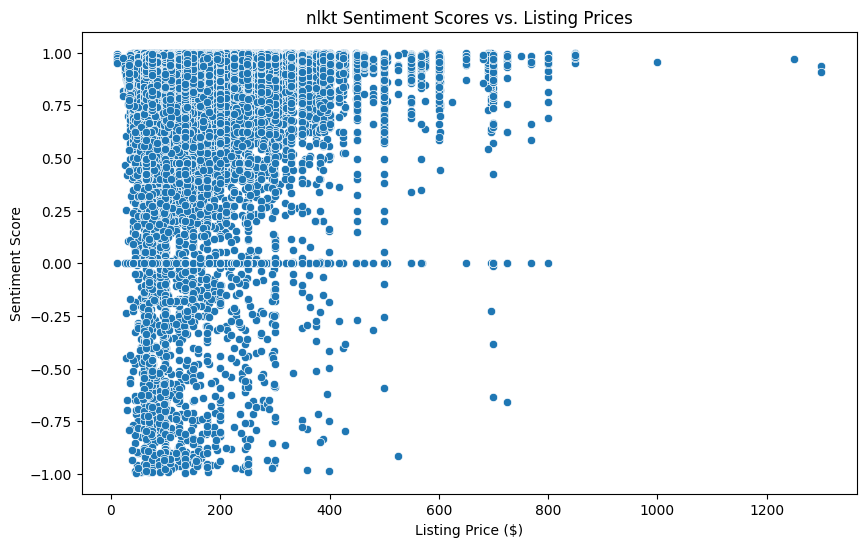

In [82]:
# mapping again the Sentiment score with prices for only english review.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sentiment_score', data=filtered_only_eng)
plt.title('nlkt Sentiment Scores vs. Listing Prices')
plt.xlabel('Listing Price ($)')
plt.ylabel('Sentiment Score')
plt.show()

In [ ]:
#the neew graph looks to be the same, so we the last conclusion stays valid.

In [83]:
positive=filtered_only_eng[filtered_only_eng['sentiment_score']>0]
negative=filtered_only_eng[filtered_only_eng['sentiment_score']<0]

In [317]:
print(filtered_only_eng[filtered_only_eng['id_x']==11069185]['comments'].iloc[0])

The room was exactly as pictured, no frills, yet adequate for my needs. The street parking was nearly impossible to find,  but you can't expect much better in Boston. I'd recommend this room to others...


In [84]:
#To pick the right words which gives us a confidence based on review that the property is good,
#we will choose only sentiments with > 0.5 value.
positive_reviews=positive[positive['sentiment_score']>0.5]
positive_reviews.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,name,host_id,price,neighbourhood_cleansed,tokens,sentiment_score
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,"[stay, islams, place, really, cool, good, loca...",0.9626
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,"[great, location, airport, city, great, amenit...",0.9061
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,"[really, enjoyed, stay, islams, house, outside...",0.9663
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,"[room, nice, clean, commodities, close, airpor...",0.9267
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,"[great, location, 5, mins, walk, airport, stat...",0.8658


In [85]:
negative_reviews=negative[negative['sentiment_score']<-0.5]
negative_reviews.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,name,host_id,price,neighbourhood_cleansed,tokens,sentiment_score
17,1178162,11420562,2014-04-01,6097987,Karthikram,Izzy was great... had clear instructions and n...,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,"[izzy, great, clear, instructions, problems, e...",-0.6802
24,1178162,12753057,2014-05-10,14113353,Chris,We didn´t meet Izzy at all!!!! After we arrive...,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,"[didn´t, meet, izzy, arrived, nobody, except, ...",-0.7798
213,1178162,94675484,2016-08-16,17356185,Giulia,nothing what I expected !\nwe start from the p...,1178162,Private Room Great Location Boston,1407005,95.0,East Boston,"[nothing, expected, start, positionthe, house,...",-0.9528
486,3992208,32444485,2015-05-18,7829595,Sunny & Tim,The listing is accurate. This is a no frills k...,3992208,Take me to Fenway! Boston studio,324630,99.0,Fenway,"[listing, accurate, frills, kindof, place, abl...",-0.7184
500,3992208,36082180,2015-06-25,26120265,Ann,We were rather disappointed with this accommod...,3992208,Take me to Fenway! Boston studio,324630,99.0,Fenway,"[rather, disappointed, accommodatiion, host, e...",-0.5575


In [326]:
print(negative_reviews[negative_reviews['id_x']==12753057]['tokens'].iloc[0])

['didn´t', 'meet', 'izzy', 'arrived', 'nobody', 'except', 'spanish', 'speaking', 'people', 'room', 'disgusting', 'smelted', 'like', 'mold', 'dirty', 'bathroom', 'wasn´t', 'cleaned', 'either', 'friend', 'wanted', 'leave', 'right', 'came…', 'dryer', 'washer', 'usable', 'assistant', 'izzy', 'washed', 'time', 'neighborhood', 'safe', 'every', 'morning', 'u', 'could', 'hear', 'people', 'fight', 'don´t', 'stay', 'it´s', 'nothing', 'like', 'u', 'would', 'expect', 'it´s', 'defenetly', 'expensive', 'nasty', 'place']


In [329]:
pos_words=[word for tokens in positive_reviews['tokens'] for word in tokens]

In [331]:
print(pos_words[:100])

['stay', 'islams', 'place', 'really', 'cool', 'good', 'location', '5min', 'away', 'subway', '10min', 'downtown', 'room', 'nice', 'place', 'clean', 'islam', 'managed', 'pretty', 'well', 'arrival', 'even', 'last', 'minute', 'recommand', 'place', 'airbnb', 'user', 'great', 'location', 'airport', 'city', 'great', 'amenities', 'house', 'plus', 'islam', 'always', 'helpful', 'even', 'though', 'away', 'really', 'enjoyed', 'stay', 'islams', 'house', 'outside', 'house', 'didnt', 'look', 'inviting', 'inside', 'nice', 'even', 'though', 'islam', 'everything', 'prepared', 'arrival', 'airport', 'station', '510', 'min', 'walk', 'away', 'little', 'issue', 'people', 'house', 'share', 'one', 'bathroom', 'really', 'problem', 'worked', 'fine', 'would', 'recommend', 'islams', 'place', 'stay', 'boston', 'room', 'nice', 'clean', 'commodities', 'close', 'airport', 'metro', 'station', 'located', 'quite', 'safe', 'area', 'islam', 'responds', 'quickly', 'helpful', 'would']


In [339]:
from collections import Counter
word_count= Counter(pos_words)
common_words=word_count.most_common(50)
words, counts = zip(*common_words)

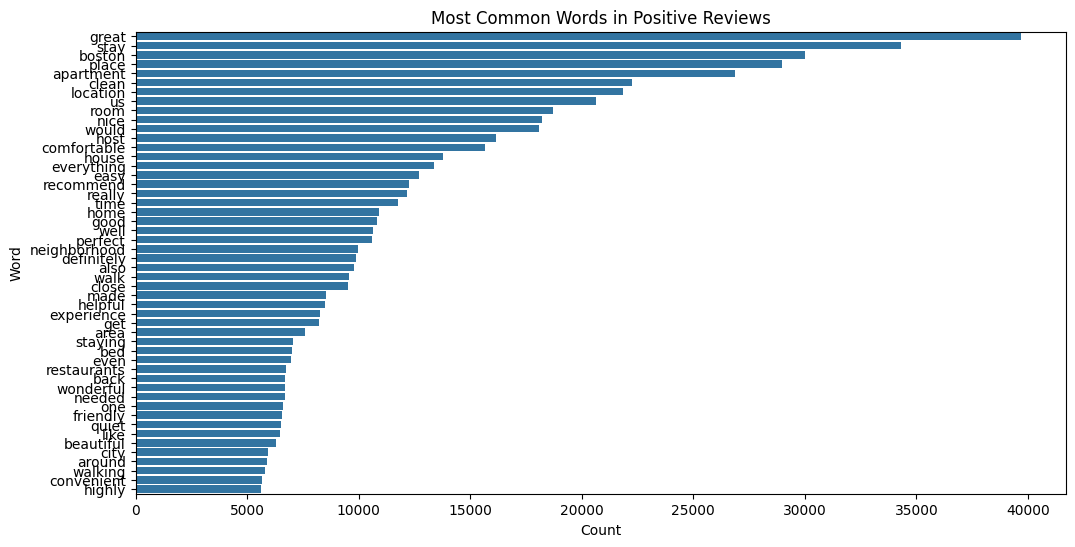

In [340]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Most Common Words in Positive Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [ ]:
#From the above results, some of the important takeaways would be:
#1. People finding the place worth the money, had showed their appreciation by providing  positive words like Great, perfect, nice 
#2. cleanliness was one of the factor
#3. ease of accesibility 
#4. Good and safe neighbourhood

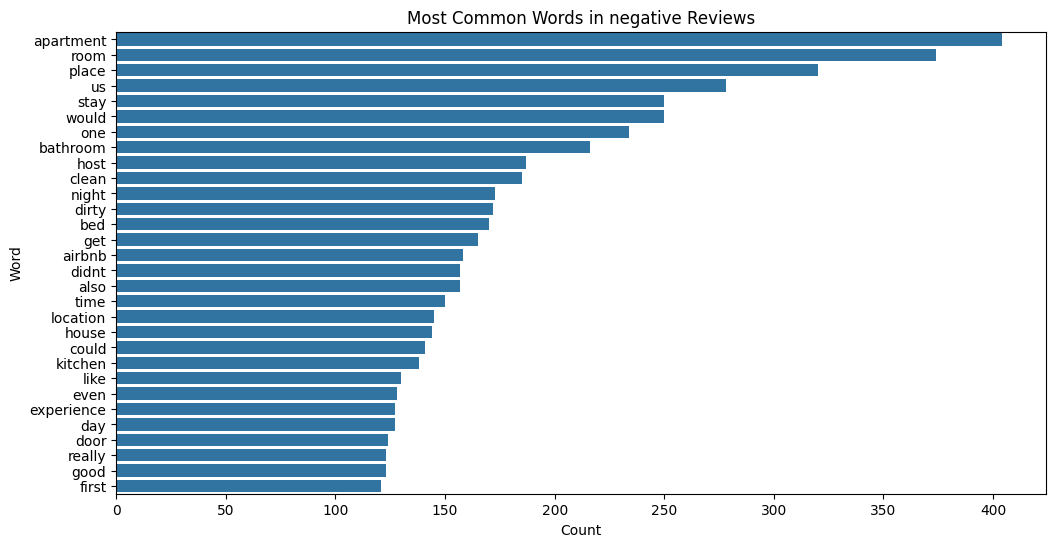

In [87]:
neg_words=[word for tokens in negative_reviews['tokens'] for word in tokens]
from collections import Counter
word_count= Counter(neg_words)
common_words=word_count.most_common(30)
words, counts = zip(*common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Most Common Words in negative Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [ ]:
# Here are some of the take away important things we can figure out:
# 1. Bathroom was one of the important factors, which means people didn't had a good bathroom experience
# 2. Similarly for kitchen
# 3. Location is another important word, so less pricing at some remote area wouldn't be a good option

In [380]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501+']

# Create a new column for price range
filtered_only_eng['price_range'] = pd.cut(filtered_only_eng['price'], bins=bins, labels=labels)

#negative['price_range'] = pd.cut(negative['price'], bins=bins, labels=labels)
#positive['price_range'] = pd.cut(positive['price'], bins=bins, labels=labels)


# Calculate the average sentiment for each price range
average_sentiment = filtered_only_eng.groupby('price_range')['sentiment_score'].mean()
#average_sentiment = negative.groupby('price_range')['sentiment_score'].count()

#average_sentiment = positive.groupby('price_range')['sentiment_score'].count()

# Print the average sentiment for each price range
print(average_sentiment)

price_range
0-50       0.806231
51-100     0.845171
101-150    0.856711
151-200    0.865256
201-250    0.859776
251-300    0.835964
301-350    0.866136
351-400    0.856564
401-450    0.876015
451-500    0.863076
501+       0.881142
Name: sentiment_score, dtype: float64


C:\Users\arshaikh\AppData\Local\Temp\ipykernel_8132\3903459897.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sentiment = filtered_only_eng.groupby('price_range')['sentiment_score'].mean()


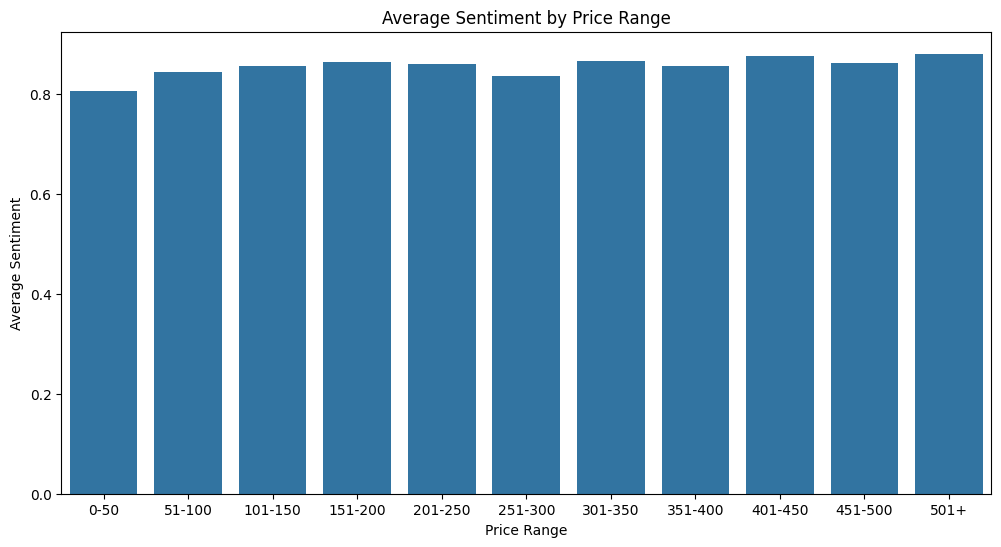

In [381]:
# Plot the average sentiment for each price range
plt.figure(figsize=(12, 6))
sns.barplot(x=average_sentiment.index, y=average_sentiment.values)
plt.xlabel('Price Range')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Price Range')
plt.show()

In [111]:
listing.rename(columns={'id_u':'id'}, inplace=True)

is_superhost
False    90.560831
True     96.890542
Name: review_scores_rating, dtype: float64
is_superhost
False    146.602351
True     149.037635
Name: price, dtype: float64


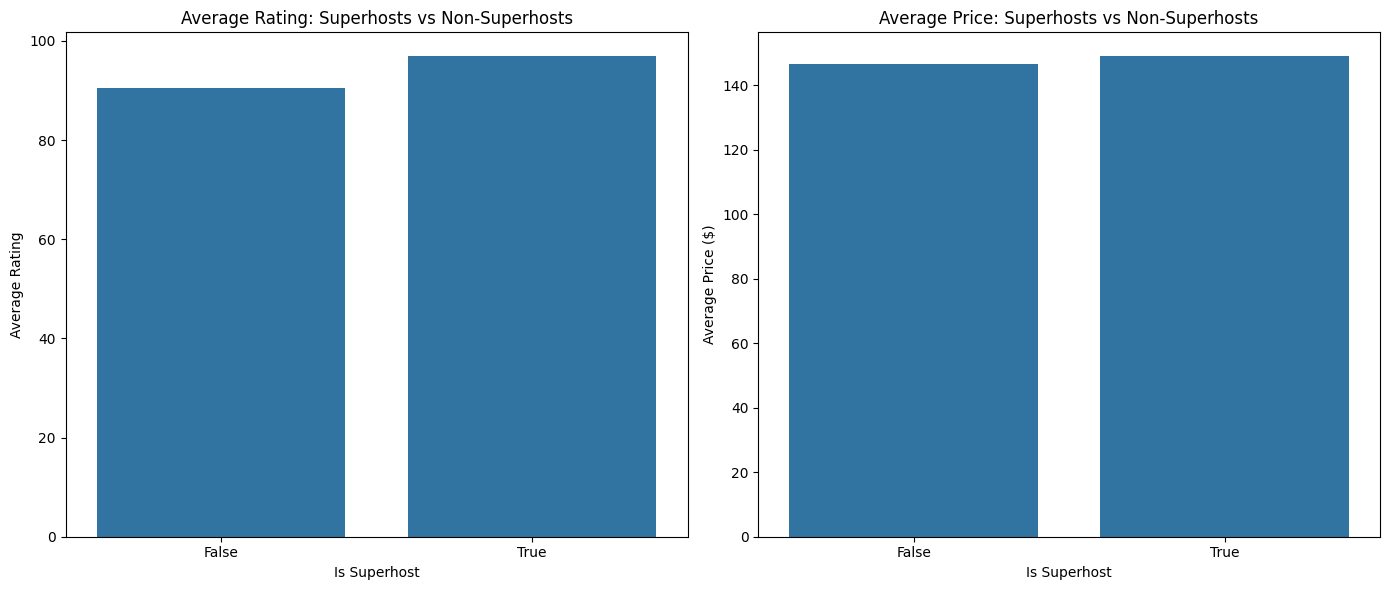

In [114]:
#Merge listings and reviews data on 'listing_id'
merged_data = pd.merge(listing, reviews, left_on='id', right_on='listing_id', how='inner')
#Add a column to indicate whether the host is a superhost
merged_data['is_superhost'] = merged_data['host_is_superhost'] == 't'
merged_data['price']=merged_data['price'].replace('[\$,]','', regex=True).astype(float)
#Comparing average ratings for superhosts vs non-superhosts
average_ratings = merged_data.groupby('is_superhost')['review_scores_rating'].mean()
print(average_ratings)

#Compare prices for superhosts vs non-superhosts
average_prices = merged_data.groupby('is_superhost')['price'].mean()
print(average_prices)

# Plot the average ratings and prices for superhosts vs non-superhosts
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=average_ratings.index, y=average_ratings.values, ax=ax[0])
ax[0].set_title('Average Rating: Superhosts vs Non-Superhosts')
ax[0].set_xlabel('Is Superhost')
ax[0].set_ylabel('Average Rating')

sns.barplot(x=average_prices.index, y=average_prices.values, ax=ax[1])
ax[1].set_title('Average Price: Superhosts vs Non-Superhosts')
ax[1].set_xlabel('Is Superhost')
ax[1].set_ylabel('Average Price ($)')

plt.tight_layout()
plt.show()

C:\Users\arshaikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\arshaikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


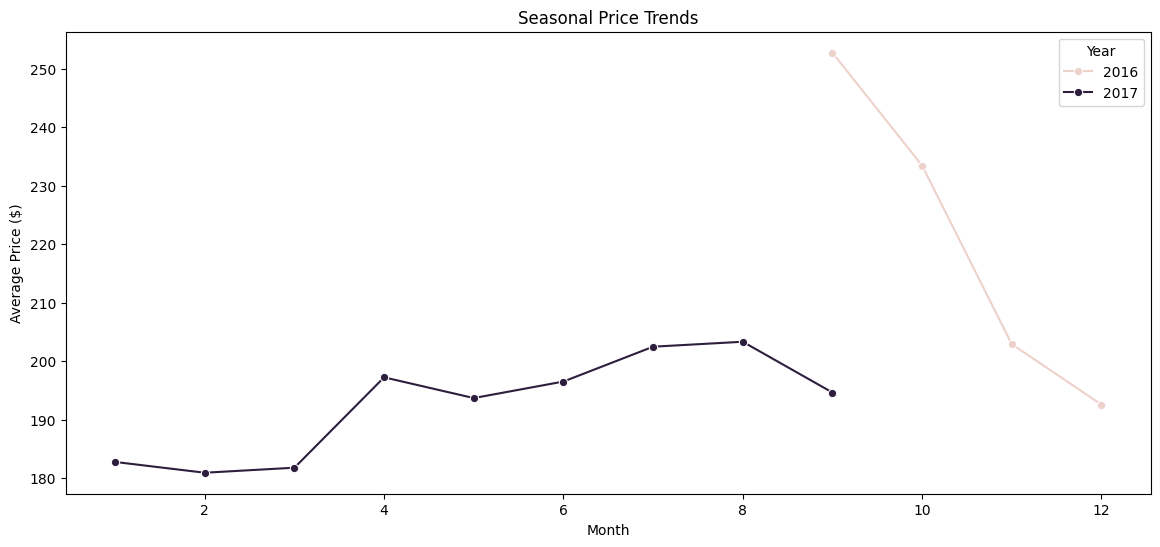

In [113]:
# Convert date column to datetime format
calendar['date'] = pd.to_datetime(calendar['date'])

# Extract month and year from the date
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year
calendar['price']=calendar['price'].replace('[\$,]','', regex=True).astype(float)

# Calculate average monthly prices
average_monthly_prices = calendar.groupby(['year', 'month'])['price'].mean().reset_index()
#average_monthly_prices
# Plot seasonal price trends
plt.figure(figsize=(14, 6))
sns.lineplot(x='month', y='price', hue='year', data=average_monthly_prices, marker='o')
plt.title('Seasonal Price Trends')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.legend(title='Year')
plt.show()


In [ ]:
Summary from above graph we see:
1. Visible demand fluctuations. There is a considerable increase in prices during the middle
of the year, could be because of high demands during the spring and summer months, 
which are typically popular travel periods. 
Conversely, the decline in prices towards the end of the year could be due to decreased 
demand during the fall and winter seasons.

2. Also there is a year-on-year difference, which depicts there were some market changes,
or there were correction in pricing algorithms, resulting in reduced pricing.


In [400]:
listing.groupby('neighbourhood_cleansed').count().reset_index()

,neighbourhood_cleansed,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Allston,260,260,260,260,260,259,175,260,260,146,91,155,144,145,151,235,235,260,235,260,260,260,260,259,144,204,204,204,260,260,260,235,260,260,260,260,260,260,215,0,260,260,258,255,260,260,260,260,260,260,259,260,260,260,260,260,260,260,2,260,75,66,91,169,260,260,260,260,260,0,260,260,260,260,260,260,187,187,182,181,182,182,182,181,182,260,0,0,260,260,260,260,260,187
1,Back Bay,302,302,302,302,302,279,224,302,302,181,118,183,149,144,197,228,228,302,228,302,302,302,302,301,214,265,265,265,302,302,302,284,302,302,302,302,302,302,263,0,302,302,299,301,302,302,302,302,302,302,301,302,302,302,299,302,302,302,5,302,47,69,111,213,302,302,302,302,302,0,302,302,302,302,302,302,243,243,237,236,236,236,236,236,235,302,0,0,302,302,302,302,302,243
2,Bay Village,24,24,24,24,24,24,20,24,24,19,14,20,17,20,19,20,20,24,20,24,24,24,24,24,16,23,23,23,24,24,24,23,24,24,24,24,24,24,23,0,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,1,24,6,4,10,20,24,24,24,24,24,0,24,24,24,24,24,24,16,16,16,16,16,16,16,16,16,24,0,0,24,24,24,24,24,16
3,Beacon Hill,194,194,194,194,194,191,148,194,194,131,95,133,124,108,131,113,113,194,113,194,194,194,194,194,138,173,173,173,194,194,194,174,194,194,194,194,194,194,158,0,194,194,194,194,194,194,194,194,194,194,194,194,194,194,193,194,194,194,2,194,48,39,84,137,194,194,194,194,194,0,194,194,194,194,194,194,170,170,169,168,168,168,168,168,168,194,0,0,194,194,194,194,194,170
4,Brighton,185,185,185,185,185,181,127,185,185,105,88,113,118,113,125,158,158,185,158,185,185,185,185,183,104,150,150,150,185,185,185,166,185,185,185,185,185,185,162,0,185,185,183,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,2,185,61,56,63,119,185,185,185,185,185,0,185,185,185,185,185,185,138,138,133,133,133,133,133,133,133,185,0,0,185,185,185,185,185,138
5,Charlestown,111,111,111,111,111,102,66,111,111,53,48,58,53,53,75,99,99,111,99,111,111,111,111,111,66,95,95,95,111,111,111,98,111,111,111,111,111,111,92,0,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,2,111,29,22,42,63,111,111,111,111,111,0,111,111,111,111,111,111,76,76,76,76,76,76,76,76,76,111,0,0,111,111,111,111,111,76
6,Chinatown,71,71,71,71,71,71,60,71,71,46,41,42,30,46,47,53,53,71,53,71,71,71,71,71,34,69,69,69,71,71,71,68,71,71,71,71,71,71,65,0,71,71,71,70,71,71,71,71,71,71,71,71,71,71,71,71,71,71,0,71,2,10,19,64,71,71,71,71,71,0,71,71,71,71,71,71,41,41,41,41,41,41,41,41,41,71,0,0,71,71,71,71,71,41
7,Dorchester,269,269,269,269,269,261,182,269,269,144,136,173,162,160,199,249,249,269,249,269,269,269,269,268,186,251,251,251,269,269,269,234,269,269,269,269,2

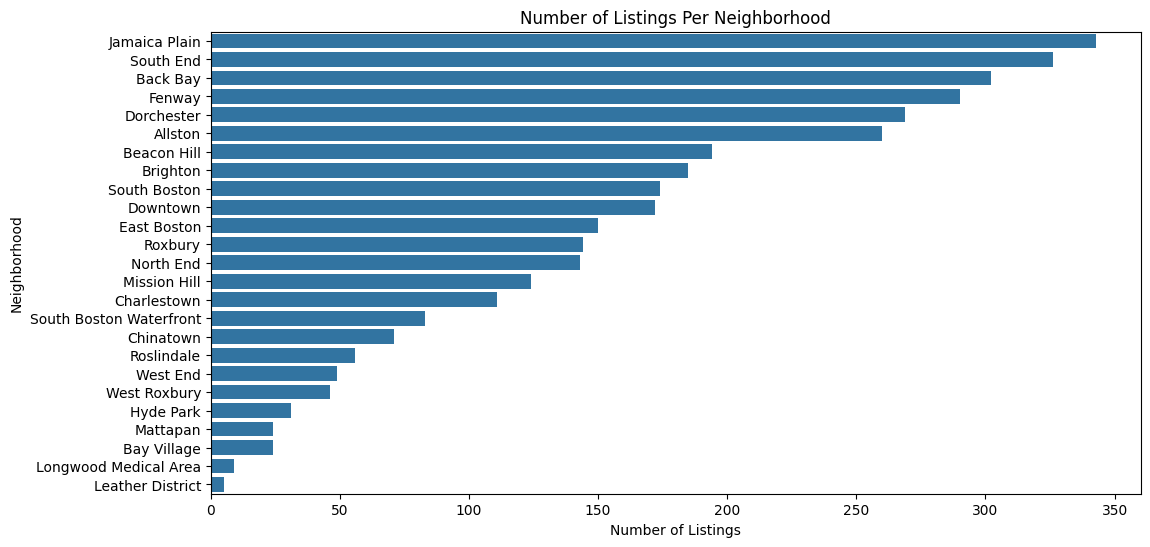

In [117]:
listings_per_neighborhood = listing['neighbourhood_cleansed'].value_counts().reset_index()
listings_per_neighborhood.columns = ['neighbourhood', 'count']

listings_per_neighborhood.head()
# Plot the number of listings per neighborhood
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='neighbourhood', data=listings_per_neighborhood)
plt.title('Number of Listings Per Neighborhood')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

In [ ]:
# summary from above:
# 1. we can surely tell that the jamaica Plain has the most AirBnB accomodations with 
# with cleansed localities and we would see a lot of visitors roaming around on the streets of 
# Jamaican plan
# 2. While Leather district seems ot have the least properties listed, mostly because it 
# would be far from the tourism destination.

In [120]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
